# Cápitulo 04 - Estudo de Caso 03

In [1]:
# Importando bibliotecas:
from platform import python_version
print('Versão Python:', python_version(), '\n')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%reload_ext watermark
%watermark -a "gustavogzr" --iversions

Versão Python: 3.11.1 

Author: gustavogzr

matplotlib: 3.7.2
pandas    : 2.0.3
numpy     : 1.25.2
seaborn   : 0.12.2



In [2]:
## Configurando o estilo dos gráficos:
from matplotlib import rcParams # rcParams: dicionário de configurações padrão para matplotlib

rcParams['figure.figsize'] = 15, 8 # Configurando o tamanho padrão das figuras
rcParams['lines.linewidth'] = 3 # Configurando a espessura das linhas
rcParams['xtick.labelsize'] = 'x-large' # Configurando o tamanho dos labels no eixo x
rcParams['ytick.labelsize'] = 'x-large' # Configurando o tamanho dos labels no eixo y

## Carregando o dataset

In [3]:
df = pd.read_csv('.arquivos_DSA/dados/dataset.csv')

In [4]:
df.shape # Verificando o tamanho do dataset

(11000, 12)

In [5]:
df.info() # Verificando os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.head(5) # Visualizando as primeiras 5 linhas

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [7]:
df.sample(5) # Visualizando 5 linhas aleatórias

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
1321,1322,F,Navio,3,1,191,3,baixa,F,4,3947,1
1715,1716,F,Navio,3,3,275,3,baixa,F,61,2123,1
2714,2715,A,Caminhao,4,4,225,3,baixa,M,51,2892,1
1220,1221,A,Caminhao,3,2,178,4,media,F,48,1079,1
9938,9939,A,Navio,7,3,288,4,media,M,3,1989,0


In [8]:
df.tail(5) # Visualizando as últimas 5 linhas

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


## EDA - Parte 1
EDA: Análise Exploratória de Dados

In [9]:
df.columns # Verificando as colunas

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [10]:
df.dtypes # Verificando os tipos de dados

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [11]:
# Lista de colunas categoricas
cats = ['corredor_armazem',
        'modo_envio',
        'prioridade_produto',
        'genero']

In [12]:
# Lista de colunas numéricas
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']
# não vamos utilizar ID porque não é uma variável que influencia no modelo
# não vamos utilizar entregue_no_prazo porque ele é o target (o que queremos prever)

In [13]:
df['entregue_no_prazo'].value_counts() # Verificando a distribuição da variável target

entregue_no_prazo
1    6563
0    4437
Name: count, dtype: int64

In [14]:
target = ['entregue_no_prazo'] # Definindo a variável target

## Explorando variáveis numéricas

In [15]:
# Resumo das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


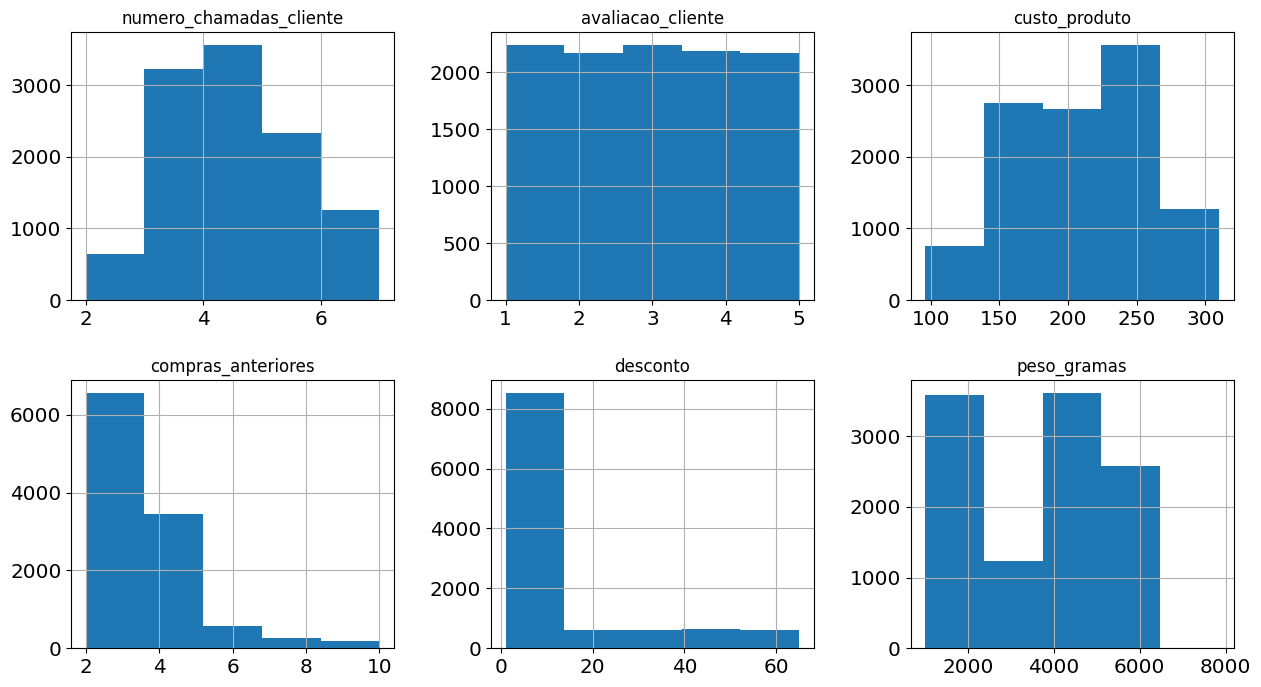

In [16]:
df[nums].hist(bins=5, layout=(2, 3)); # Histograma das variáveis numéricas

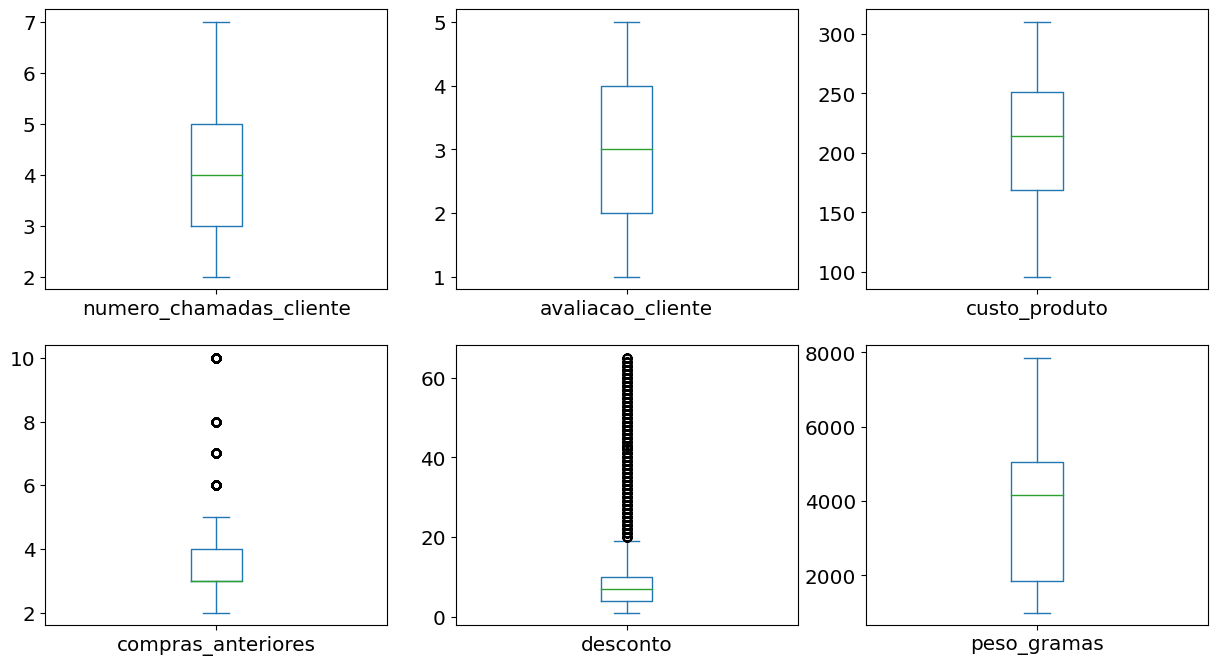

In [17]:
# gerar uma imagem com 6 gráficos (2 linhas e 3 colunas) em boxplot para as variáveis numéricas 
for i, col in enumerate(nums, start=1):
    plt.subplot(2, 3, i)
    df[col].plot(kind='box')

## Explorando variáveis categóricas

In [18]:
df[cats].describe() # Resumo das variáveis categóricas

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [23]:
# Lista o total por categoria para cada coluna categórica
for col in cats:
    print(f'''Total de Registros por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()

Total de Registros por Categoria da Variável corredor_armazem:
corredor_armazem
F    3666
D    1834
C    1834
A    1833
B    1833
Name: count, dtype: int64

Total de Registros por Categoria da Variável modo_envio:
modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

Total de Registros por Categoria da Variável prioridade_produto:
prioridade_produto
baixa    5298
media    4754
alta      948
Name: count, dtype: int64

Total de Registros por Categoria da Variável genero:
genero
F    5546
M    5454
Name: count, dtype: int64



## Análise Univariada - Boxplot

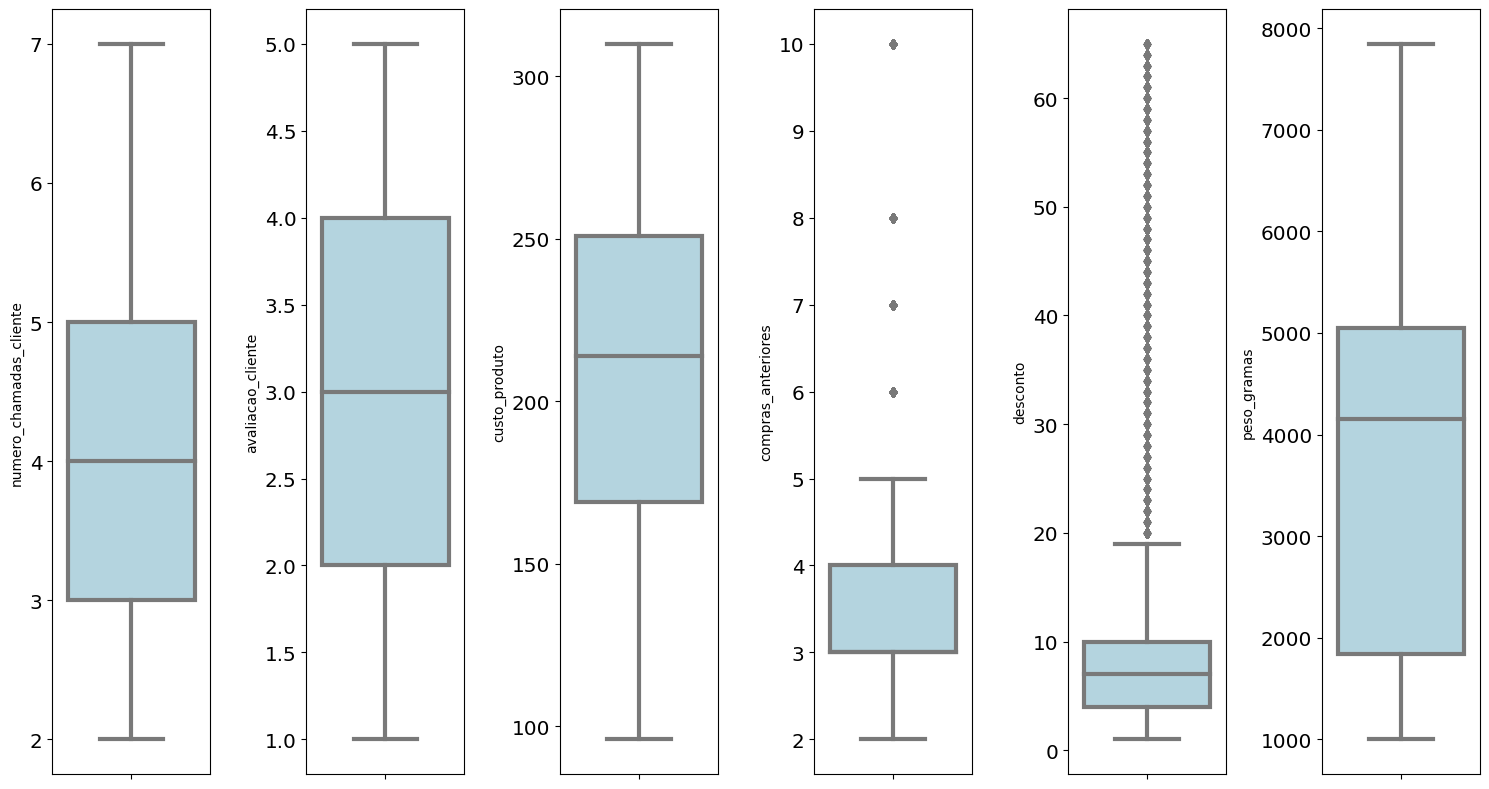

In [31]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1) # 1 linha e 6 colunas
    sns.boxplot(y=df[features[i]], orient='v', color = 'lightblue')
    plt.tight_layout()

## Análise Univariada - Dist Plots

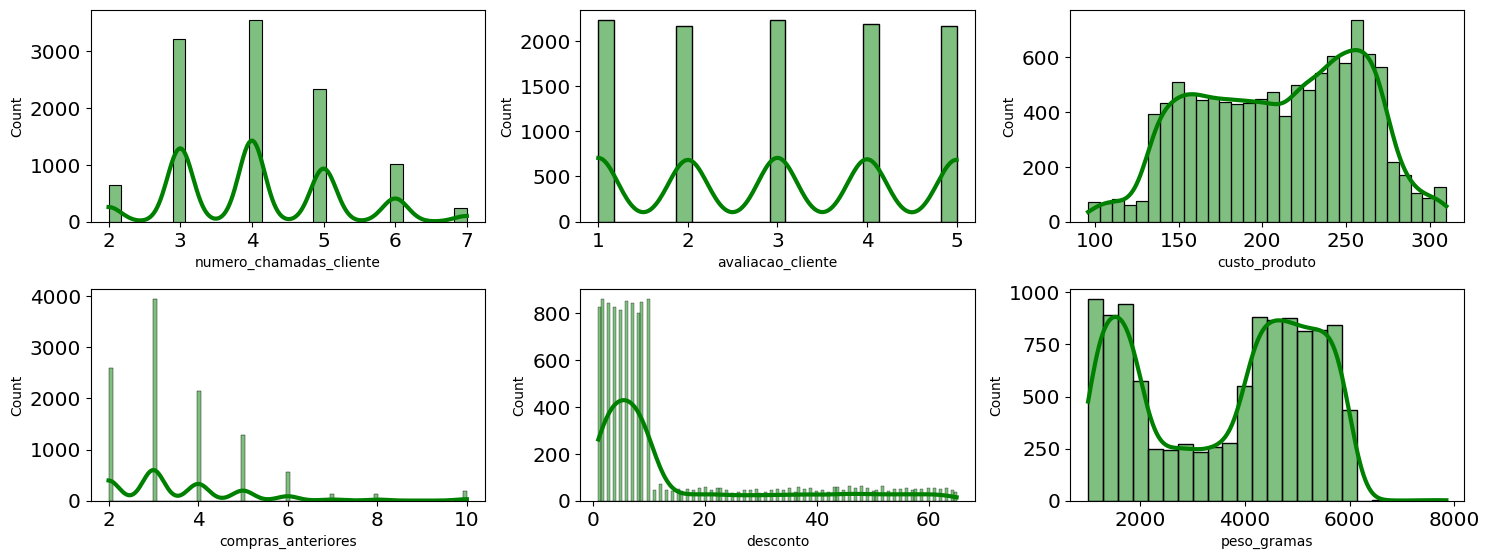

In [42]:
features = nums
for i in range(0, len(features)):
    plt.subplot(3, int(len(features)/2), i+1) # 3 linhas e 2 colunas
    sns.histplot(x=df[features[i]], kde=True, color = 'green')
    # kde = True: plota a curva de densidade
    plt.xlabel(features[i])
    plt.tight_layout()

## Análise Univariada - Violin Plots

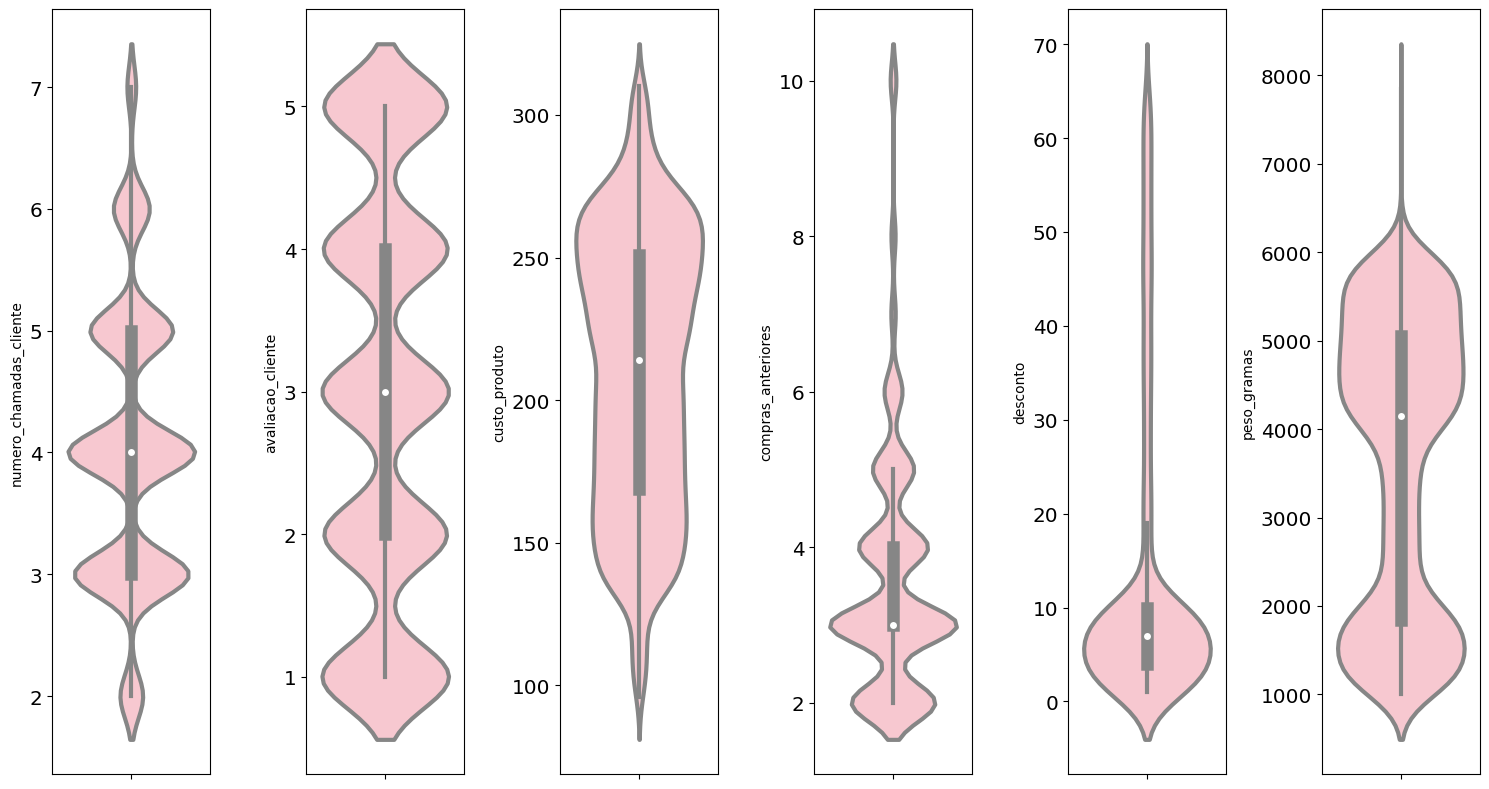

In [45]:
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1) # 1 linha e 6 colunas
    sns.violinplot(y=df[features[i]], orient='v', color = 'pink')
    plt.tight_layout()

## Análise Univariada - Count Plots (variáveis categóricas)

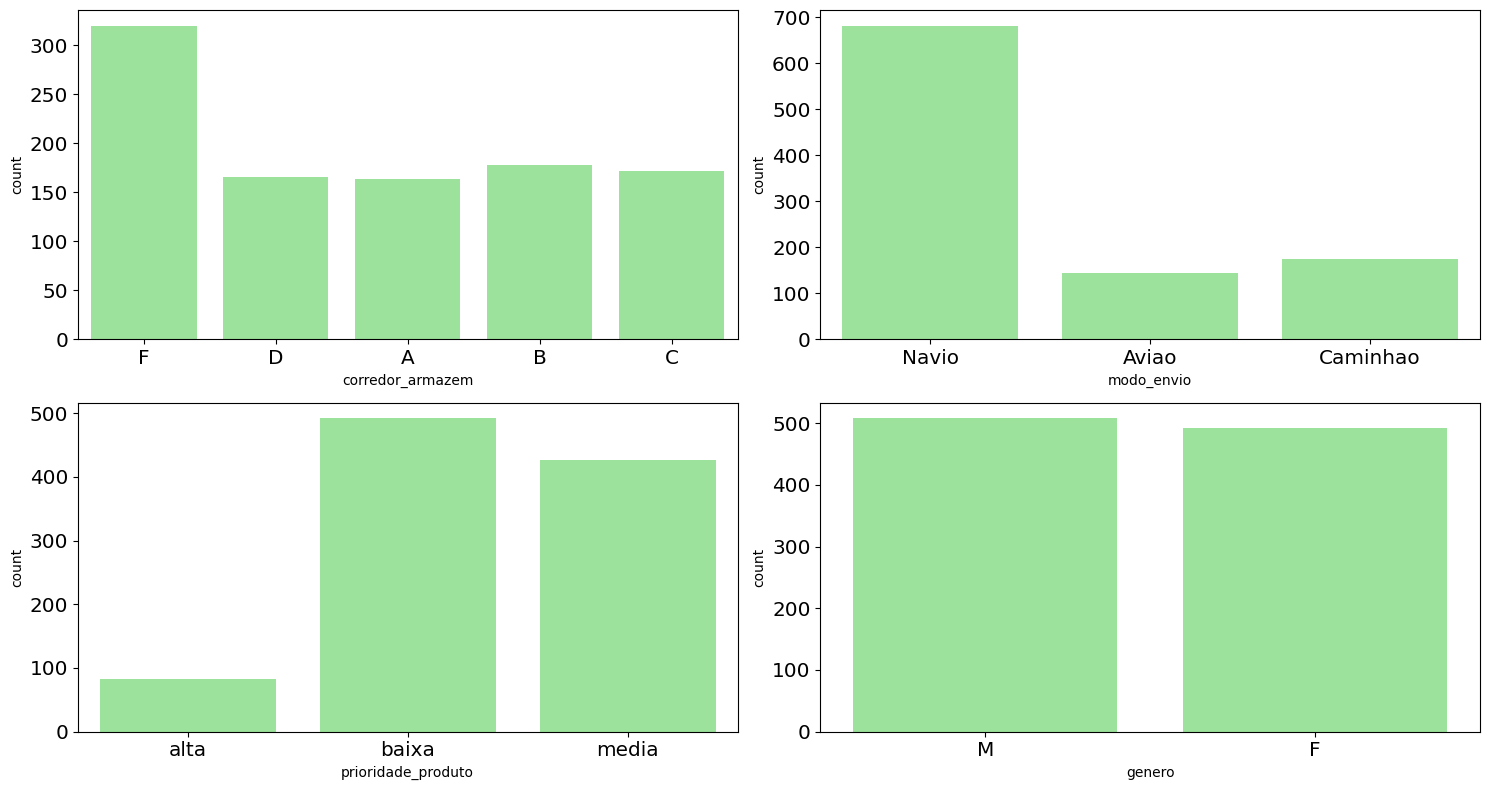

In [53]:
df_sample = df.sample(1000, random_state=42) # Amostra aleatória de 1000 registros
for i, coluna in enumerate(cats):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_sample[coluna], color='lightgreen', orient='v')
    plt.tight_layout()

<Axes: xlabel='entregue_no_prazo', ylabel='count'>

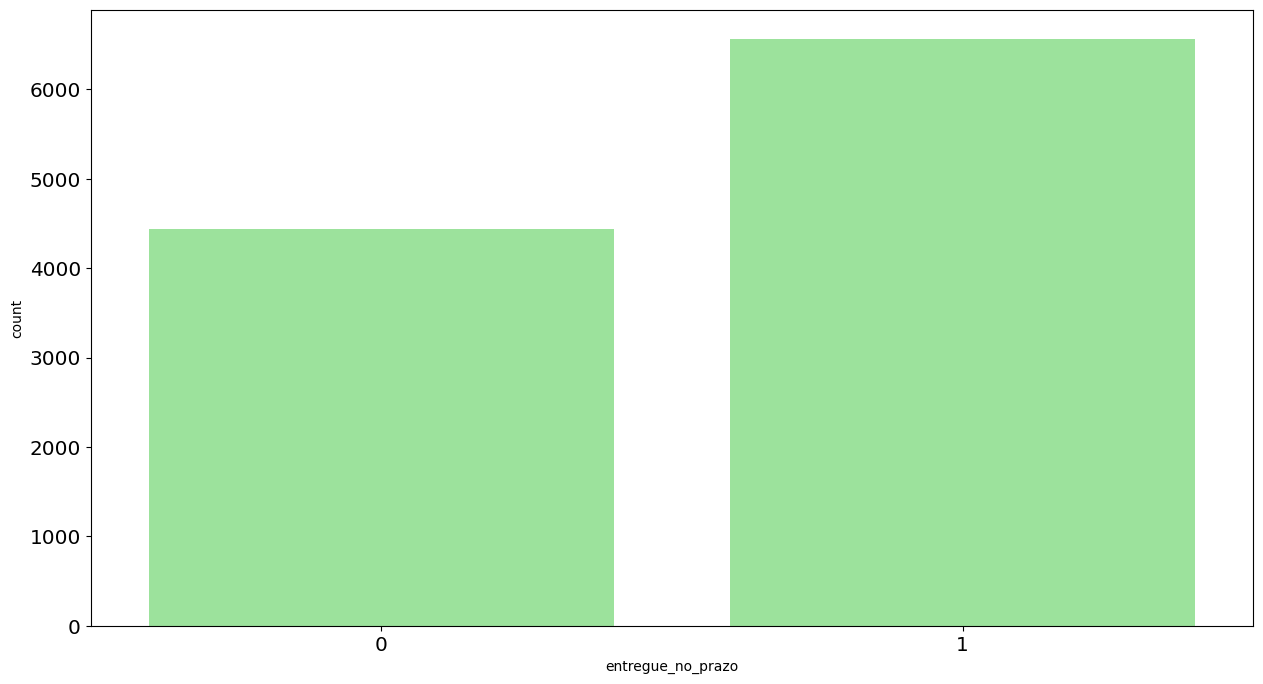

In [61]:
# Count Plot da variável TARGET
sns.countplot(x='entregue_no_prazo', data=df, color='lightgreen')

## Análise Bivariada - Mapa de Correlação

In [62]:
df[nums].corr() # Correlação entre as variáveis numéricas

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


In [64]:
corr_df = df[nums].corr() # Correlação entre as variáveis numéricas
corr_df # Visualizando a matriz de correlação

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<Axes: >

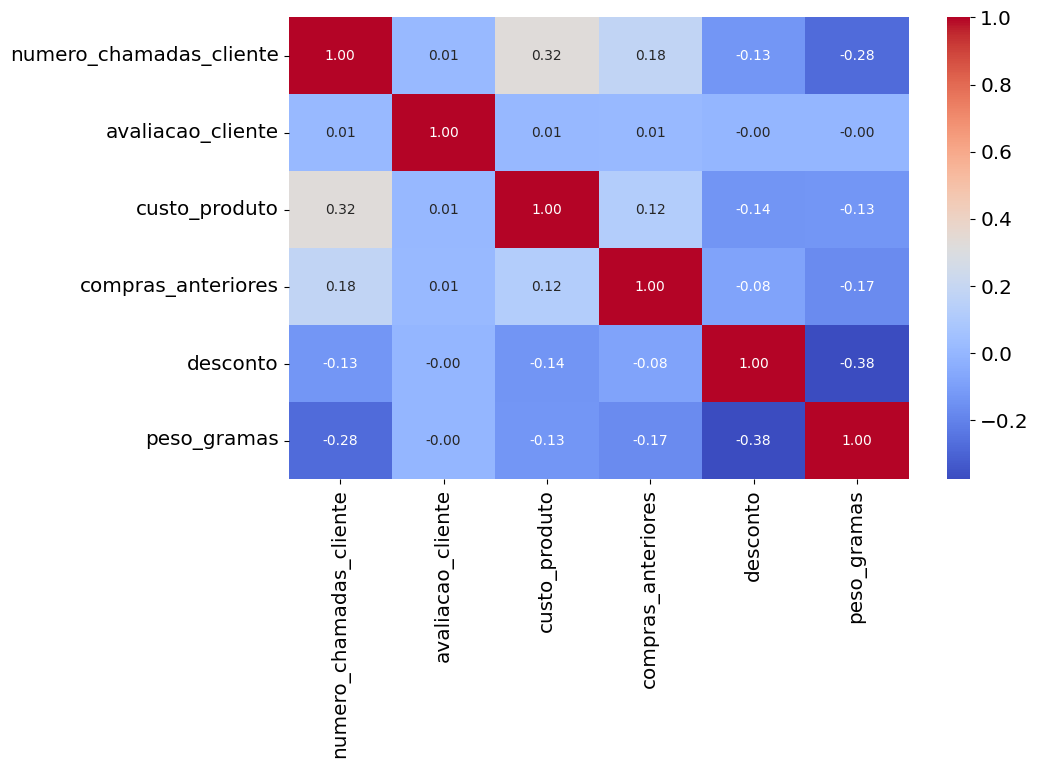

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
# annot = True: exibe os valores dentro dos quadrados
# fmt = '.2f': formatação dos valores para 2 casas decimais

## Análise Bivariada - Pairplot

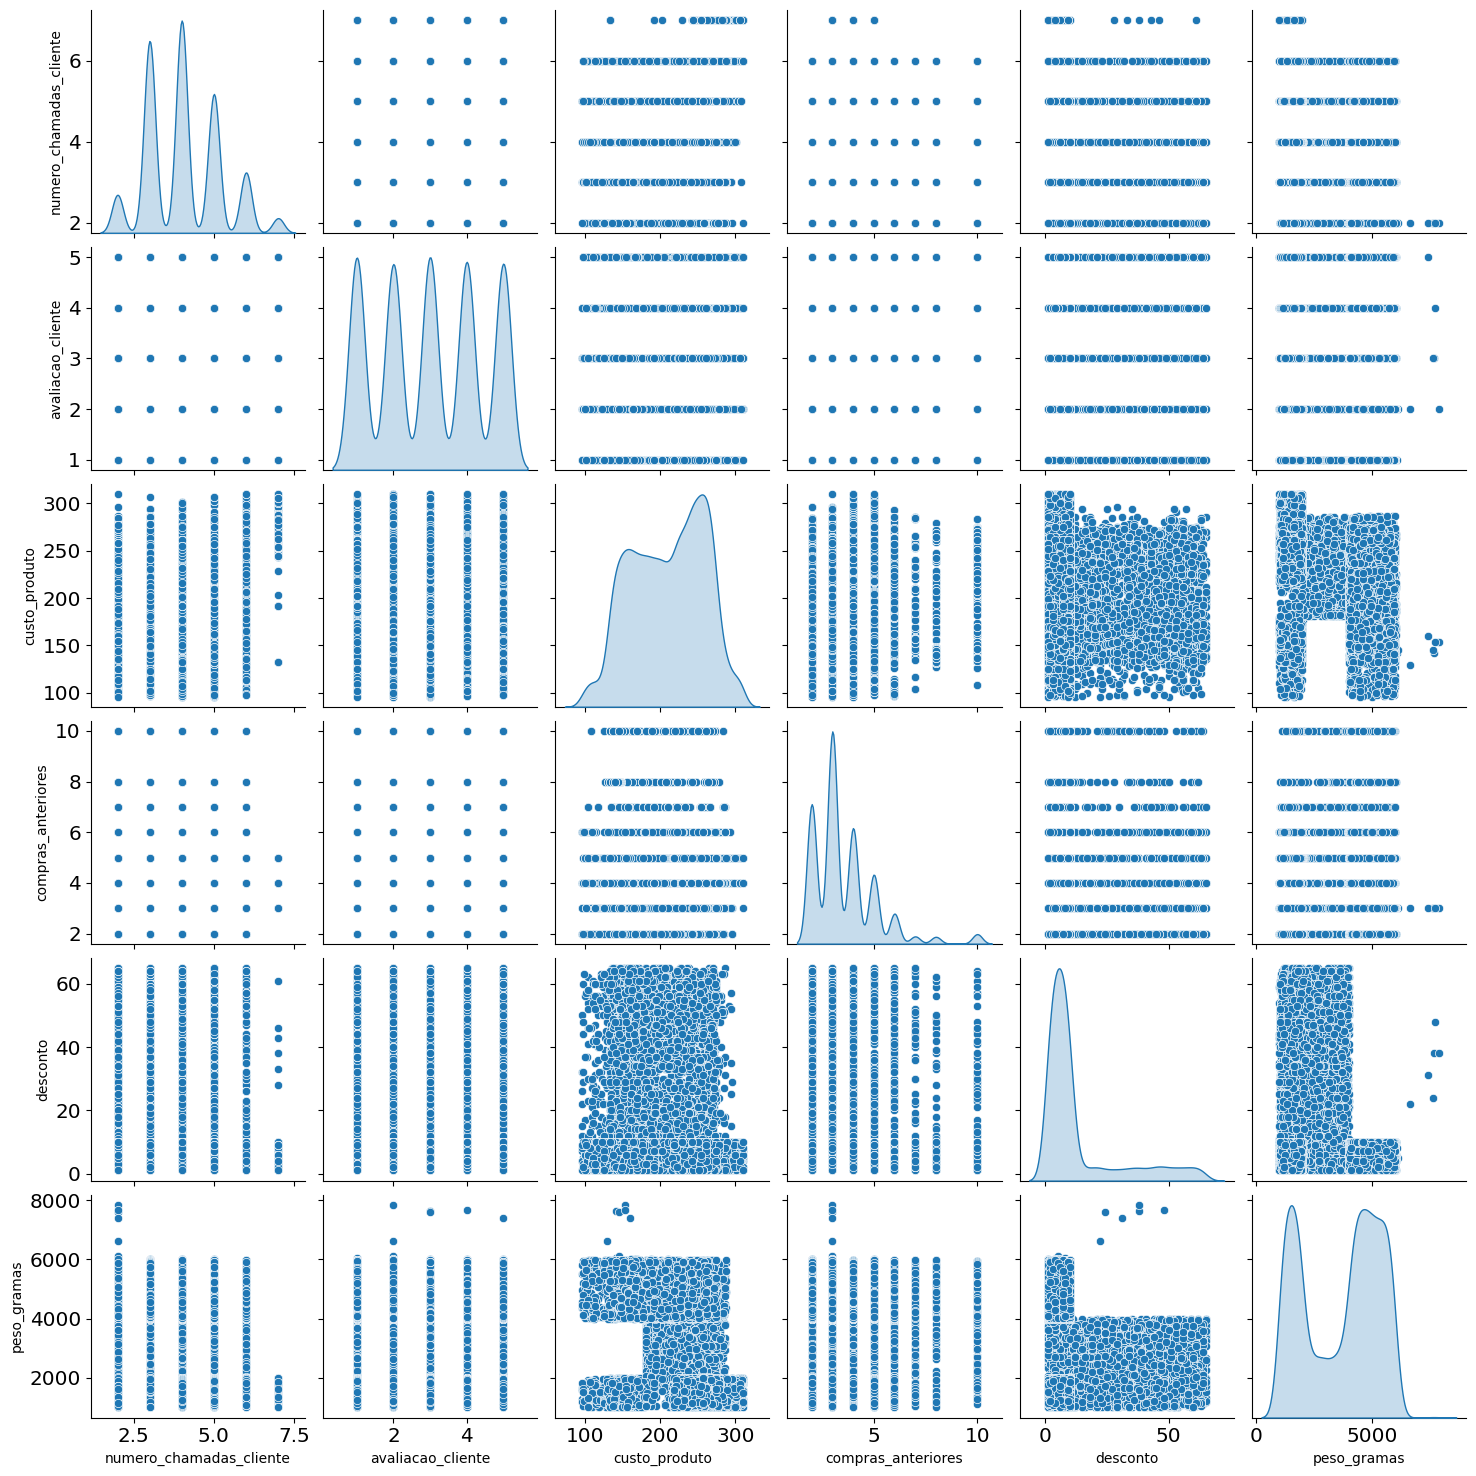

In [80]:
sns.pairplot(df[nums], diag_kind='kde') # Pairplot das variáveis numéricas
# diag_kind = 'kde': plota a curva de densidade na diagonal

## Colunas Catégoricas vs Variável Target

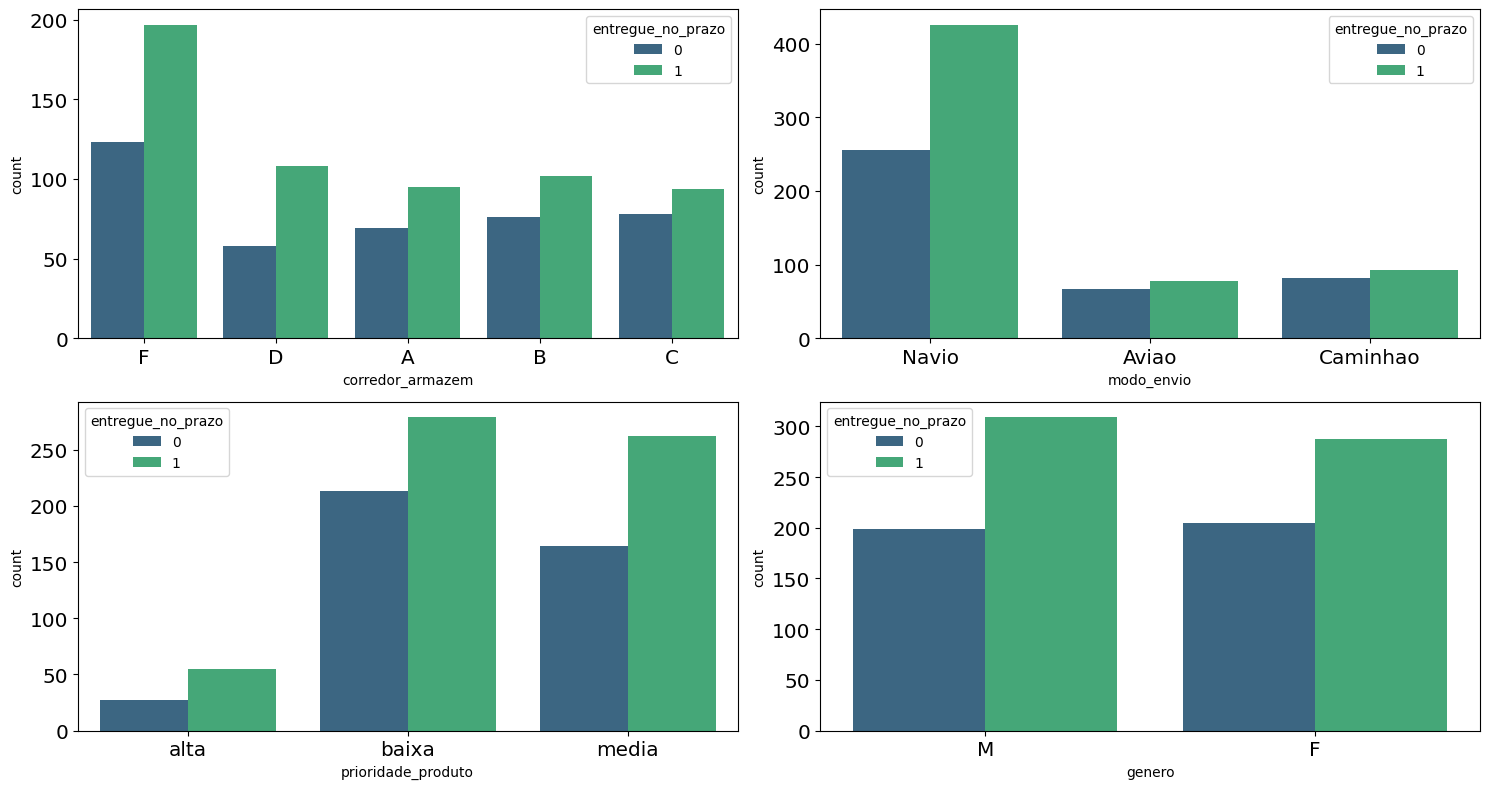

In [88]:
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data = df_sample, x = cats[i], hue = 'entregue_no_prazo', palette='viridis')
    # hue: variável que define a cor da legenda
    plt.tight_layout()

## EDA - Parte 2

1 - Os atrasos nas estregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?

In [90]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [91]:
df['modo_envio'].value_counts() # Verificando a distribuição da variável modo_envio

modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

In [95]:
df_group1 = df.groupby(['modo_envio', 'entregue_no_prazo']).size().unstack()
# size(): conta o número de ocorrências
# unstack(): reorganiza os dados em um DataFrame
df_group1

entregue_no_prazo,0,1
modo_envio,,
Aviao,708,1069
Caminhao,725,1035
Navio,3004,4459
